In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
file_path = 'heart_cleaned.csv'  
df = pd.read_csv(file_path)

In [ ]:
# Display the first 5 rows of the dataframe to get a quick overview of the data
df.head()

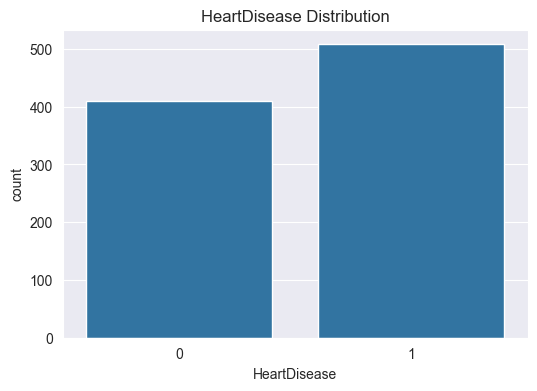

In [ ]:

# Create a figure with a specified size of 6 inches wide by 4 inches high
plt.figure(figsize=(6, 4))

# Create a count plot to show the distribution of the 'HeartDisease' variable in the dataframe
sns.countplot(data=df, x='HeartDisease')

# Set the title for the plot to indicate what it represents
plt.title('HeartDisease Distribution')

# Display the plot
plt.show()


In [ ]:
# Select all columns of type 'float64' or 'int64', excluding the 'HeartDisease' column
columns_to_count = df.select_dtypes(include=['float64', 'int64']).drop('HeartDisease', axis=1)

# Get the total number of selected numeric columns
num_columns = columns_to_count.shape[1]

# Get a list of the column names of the selected numeric columns
columns = columns_to_count.columns.tolist()

# Print the total number of selected numeric columns and the names of these columns
print(f'total {num_columns} columns:')
print(columns)


totaly 11 columns：
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [ ]:
# Define a list of categorical columns present in the dataframe
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Define a list of numeric columns present in the dataframe
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


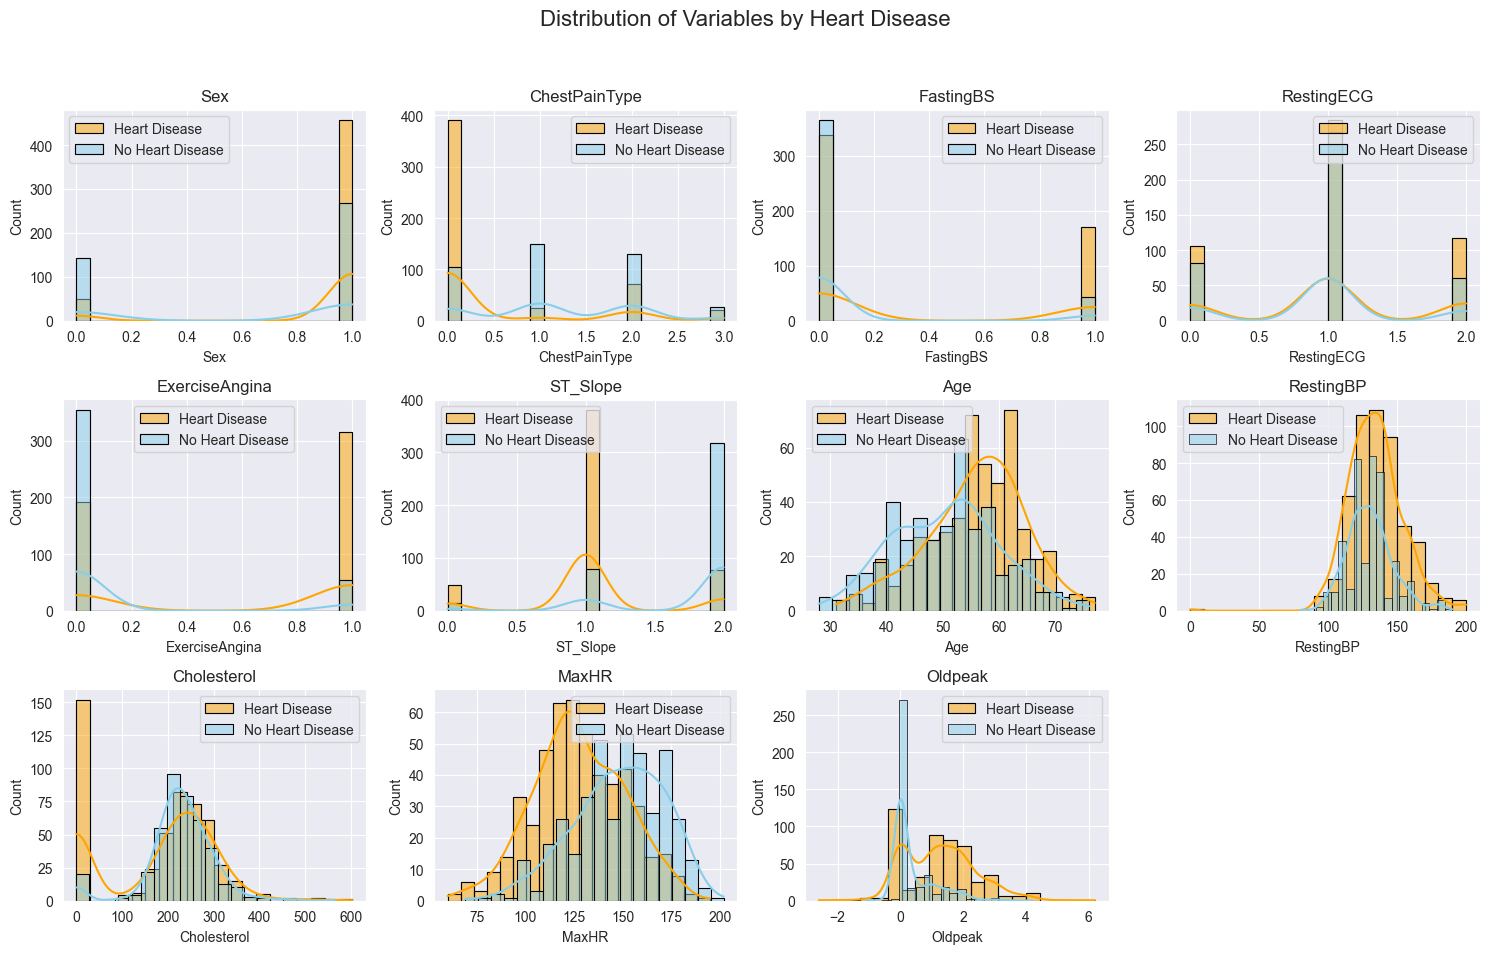

In [ ]:
# Create a histogram for each variable in both categorical and numeric columns
columns_to_plot = categorical_columns + numeric_columns

# Set the figure size for the overall plot grid
plt.figure(figsize=(15, 10))

# Loop through each column to create subplots
for idx, column in enumerate(columns_to_plot, 1):
    # Create a 3x4 subplot grid and place each subplot based on index
    plt.subplot(3, 4, idx)
    
    # Plot the histogram for patients with Heart Disease (value 1)
    sns.histplot(df[df['HeartDisease'] == 1][column], bins=20, color='orange', kde=True, edgecolor='black', alpha=0.5, label='Heart Disease')
    
    # Plot the histogram for patients without Heart Disease (value 0)
    sns.histplot(df[df['HeartDisease'] == 0][column], bins=20, color='skyblue', kde=True, edgecolor='black', alpha=0.5, label='No Heart Disease')
    
    # Set the title for each subplot to the current column's name
    plt.title(column)
    
    # Add a legend to distinguish between 'Heart Disease' and 'No Heart Disease' plots
    plt.legend()

# Set the overall title for the collection of subplots
plt.suptitle('Distribution of Variables by Heart Disease', fontsize=16)

# Adjust the layout to prevent overlap of subplots and make space for the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the entire set of plots
plt.show()


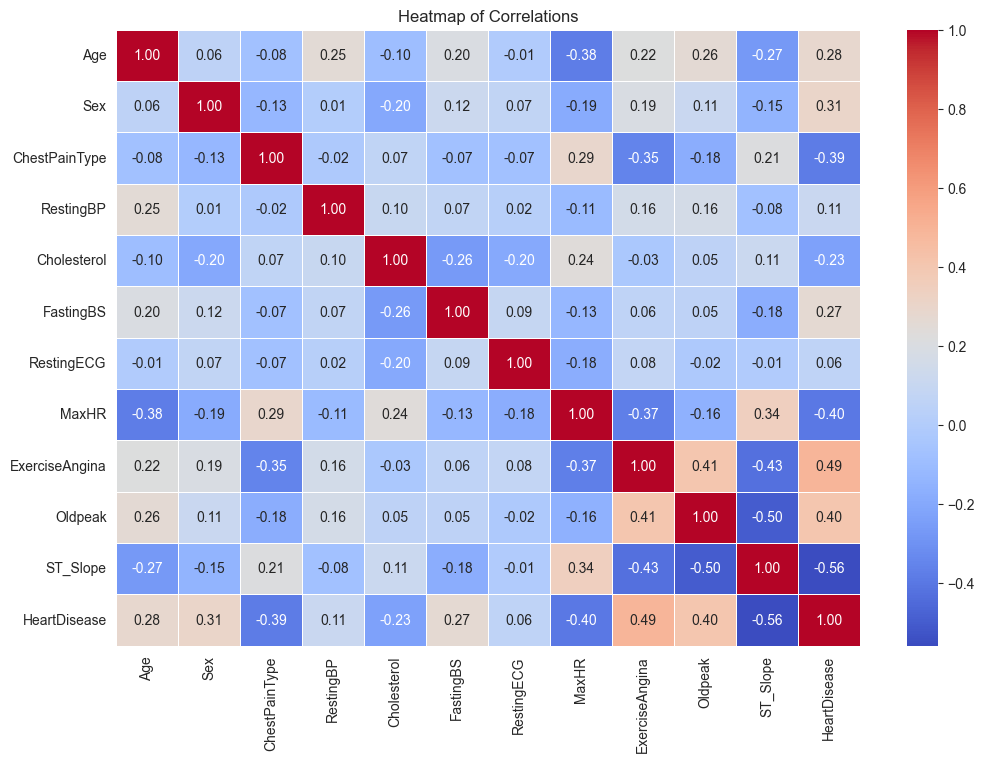

In [ ]:
# Set up the figure size for the heatmap plot
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix for the dataframe
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations between numeric features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title for the heatmap
plt.title('Heatmap of Correlations')

# Display the heatmap
plt.show()


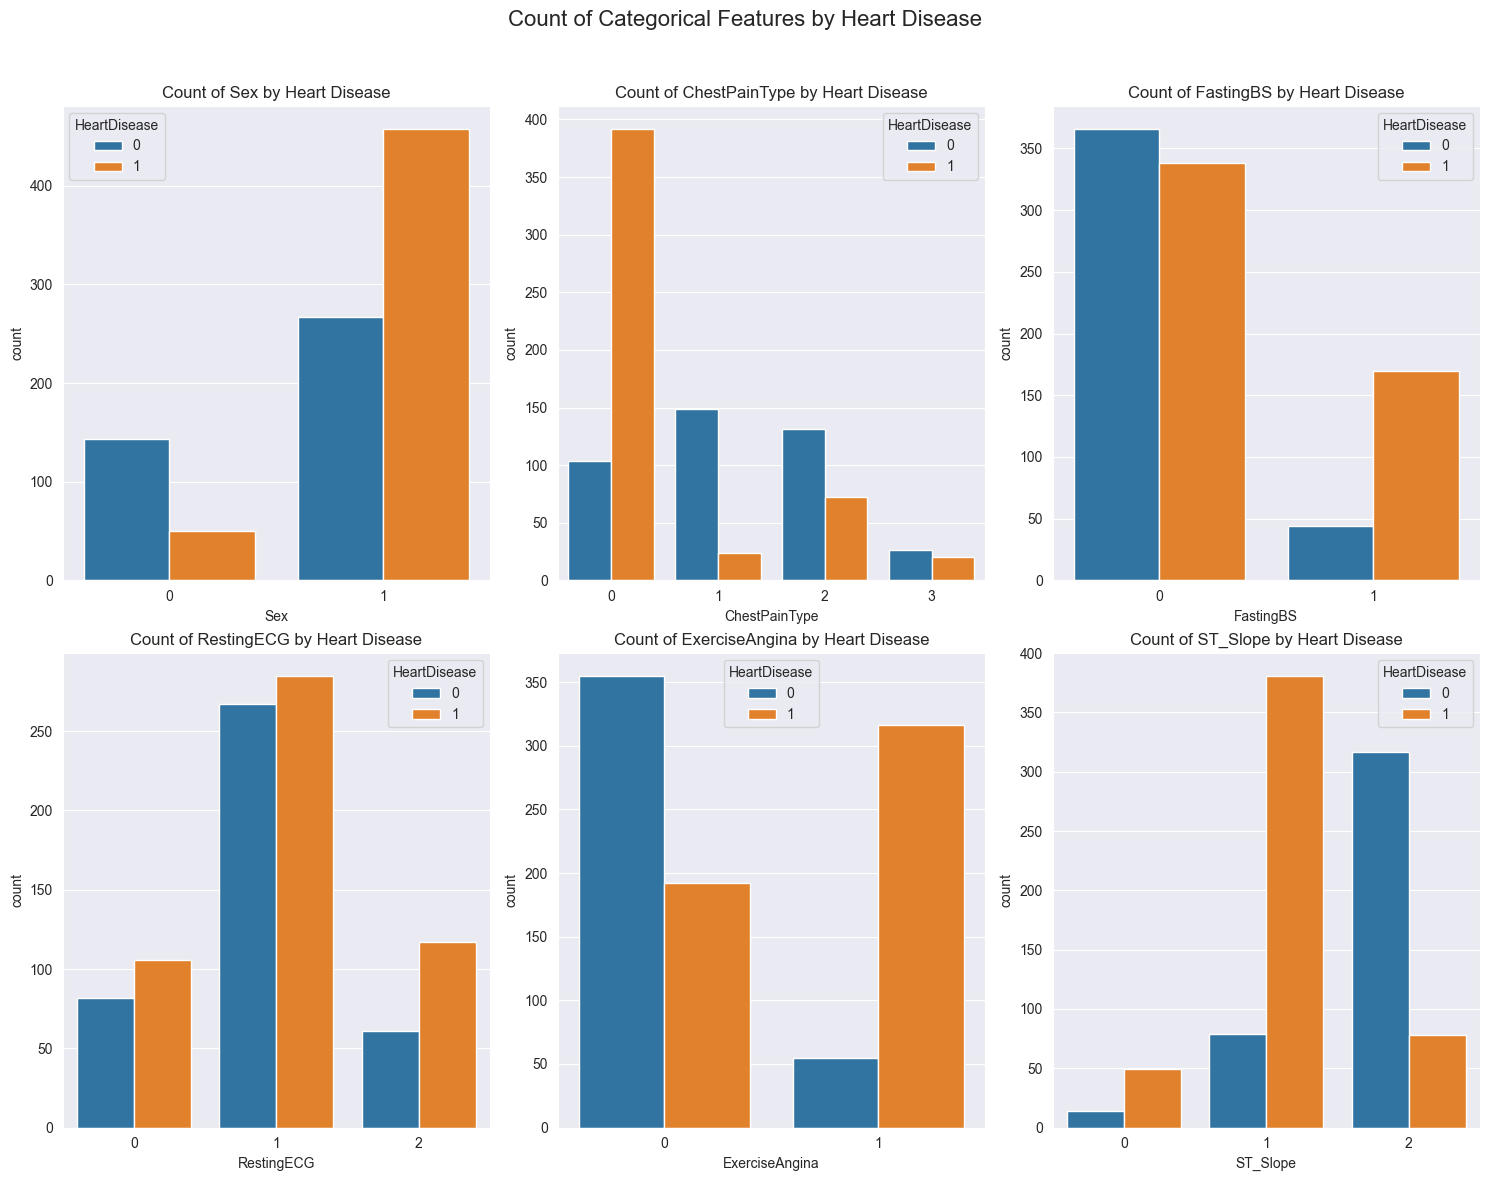

In [ ]:

# Set up the figure size for the overall plot grid
plt.figure(figsize=(15, 12))

# Loop through each categorical feature to create subplots
for idx, feature in enumerate(categorical_columns, 1):
    # Create a 2x3 subplot grid and place each subplot based on index
    plt.subplot(2, 3, idx)

    # Create a count plot for each categorical feature, colored by the 'HeartDisease' variable
    sns.countplot(data=df, x=feature, hue="HeartDisease")

    # Set the title for each subplot to describe the current feature being plotted
    plt.title(f'Count of {feature} by Heart Disease')

    # Adjust the layout to prevent overlap within each subplot
    plt.tight_layout()

# Set an overall title for the entire collection of subplots
plt.suptitle('Count of Categorical Features by Heart Disease', fontsize=16)

# Adjust the spacing between the subplots and the overall title
plt.subplots_adjust(top=0.9)

# Display the entire set of plots
plt.show()


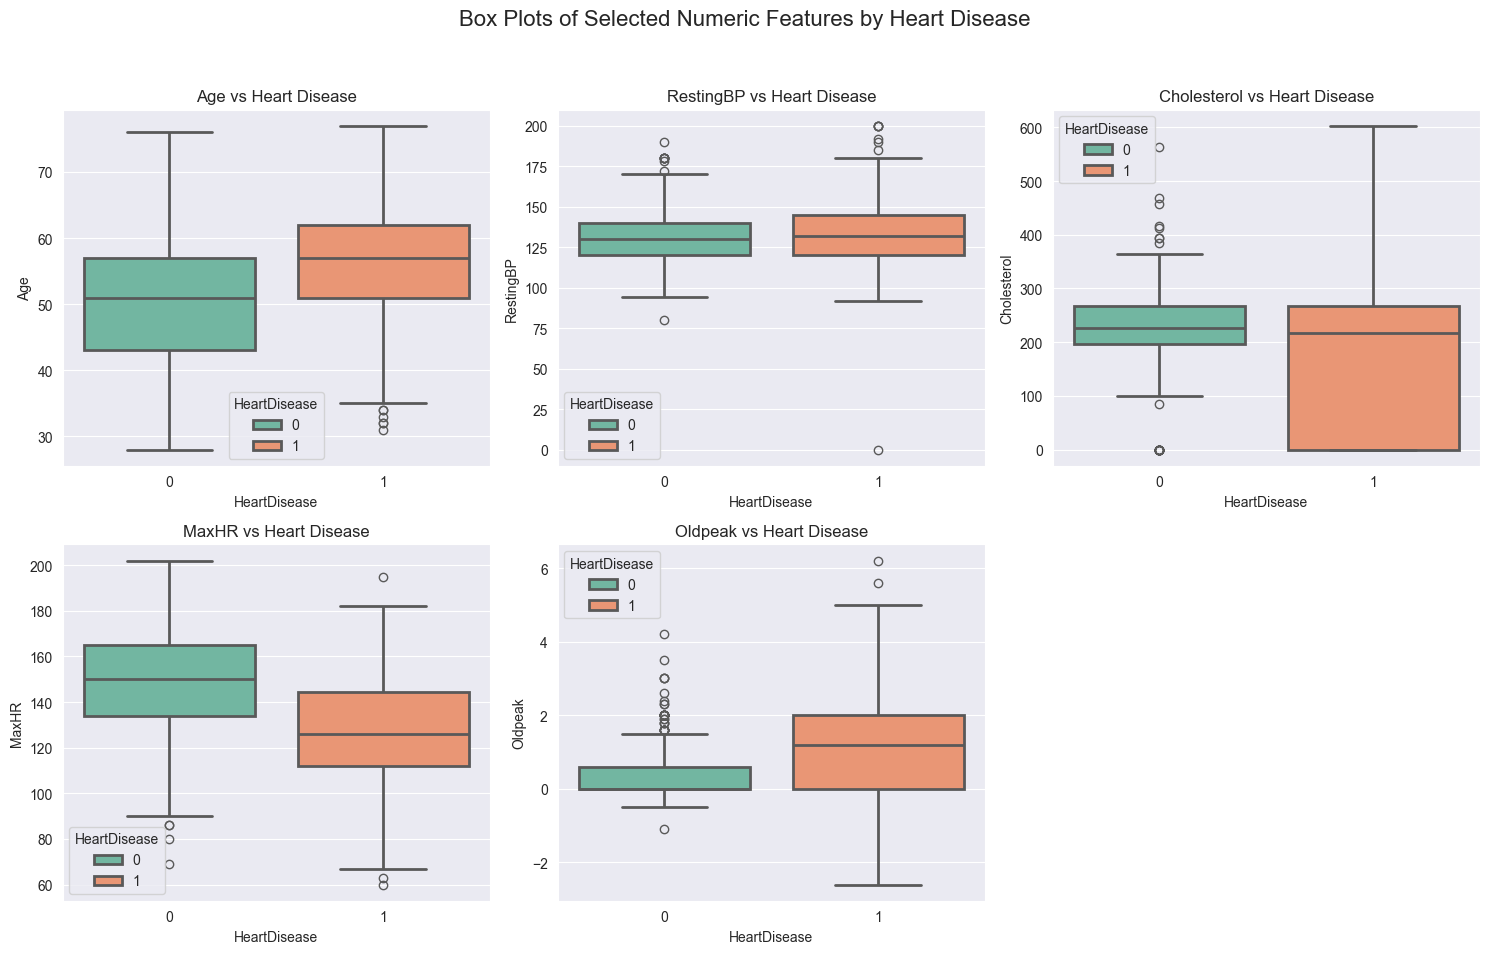

In [ ]:
# Set up the figure size for the overall plot grid
plt.figure(figsize=(15, 10))

# Loop through each numeric feature to create subplots
for idx, feature in enumerate(numeric_columns, 1):
    # Create a 2x3 subplot grid and place each subplot based on index
    plt.subplot(2, 3, idx)

    # Create a box plot for each numeric feature, split by 'HeartDisease'
    sns.boxplot(data=df, x='HeartDisease', y=feature, hue='HeartDisease', palette="Set2", linewidth=2)

    # Set the title for each subplot to describe the current feature being plotted
    plt.title(f'{feature} vs Heart Disease')

# Set an overall title for the entire collection of subplots
plt.suptitle('Box Plots of Selected Numeric Features by Heart Disease', fontsize=16)

# Adjust the layout to prevent overlap and make space for the overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the entire set of plots
plt.show()
